# Argon/xenon energy resolution, NR acceptance efficiency, quenching factors

In [1]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean


# NR acceptance

## Xenon data from https://arxiv.org/abs/1802.06039

## Argon data from https://arxiv.org/abs/1707.08145

(4, 100)

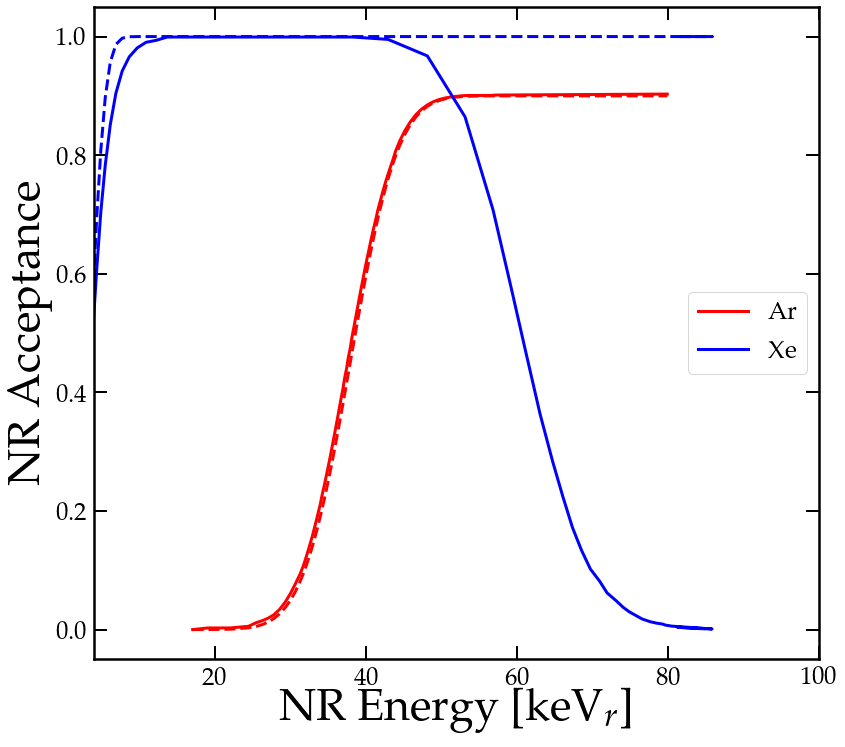

In [6]:
def erf_eff(E,eff_max,E_th,E_slope):
    return eff_max*0.5*(erf((E-E_th)/E_slope)+1)

def erf_Xe(E):
    return erf_eff(E,1.0,3.6,2.1)

def erf_Ar(E):
    return erf_eff(E,0.9,37.9,7)


fig,ax = MySquarePlot('NR Energy [keV$_r$]','NR Acceptance')

effdata = loadtxt(data_dir+'detector/eff_Ar.txt',delimiter=',')
E = effdata[:,0]
plt.plot(E,effdata[:,1],'r-',label='Ar',lw=3)
plt.plot(E,erf_Ar(E),'r--',lw=3)

effdata = 10.0**loadtxt(data_dir+'detector/eff_Xe.txt',delimiter=',')
E = effdata[:,0]
plt.plot(E,effdata[:,1],'b-',label='Xe',lw=3)
plt.plot(E,erf_Xe(E),'b--',lw=3)
plt.legend()

plt.xlim([4,100])

# Energy resolution fits

## Xenon data from https://arxiv.org/abs/1506.08309

## Argon data from https://arxiv.org/abs/1707.08145

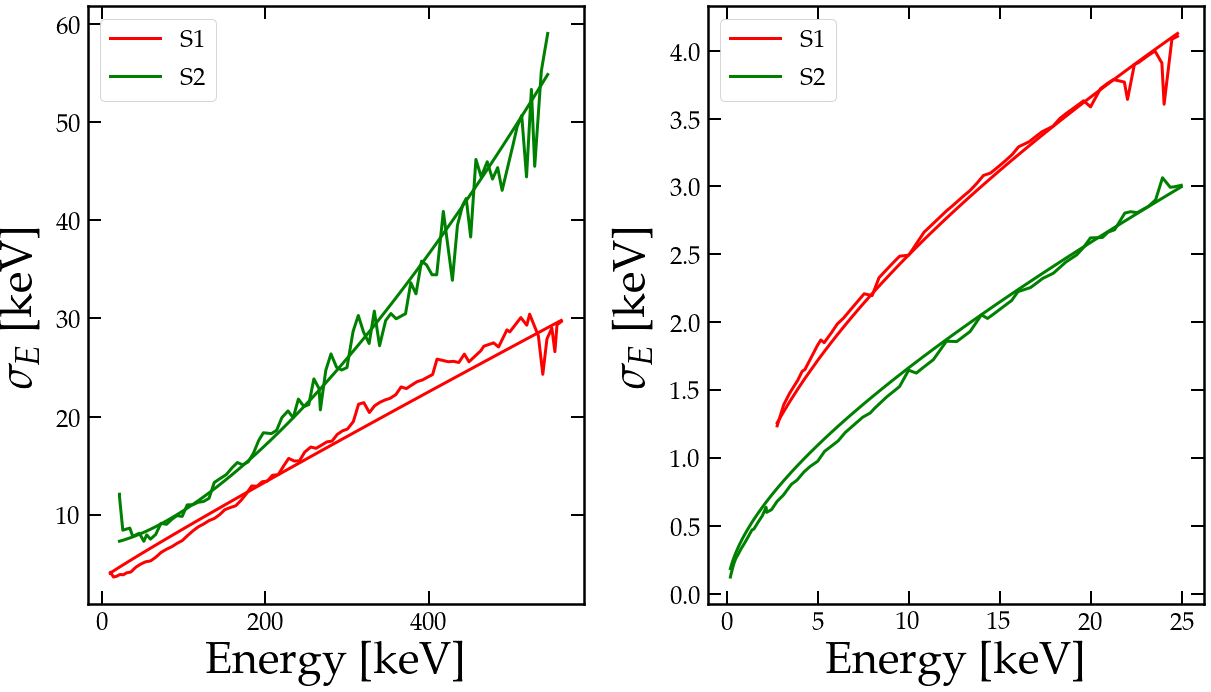

In [200]:


fig,ax1,ax2 = MyDoublePlot('Energy [keV]','$\sigma_E$ [keV]','Energy [keV]','$\sigma_E$ [keV]')

def eres_sqrt(E_r,c1=0.33,c2=0.0):
    return c1*sqrt(E_r)+c2*E_r

def eres_powerlaw(E,Eslope,Epow,Ec):
    return (E/Eslope)**Epow+Ec
   
def eres_ArS1(E):
    return eres_powerlaw(E,18.0,0.95,3.5)
def eres_ArS2(E):
    return eres_powerlaw(E,45.0,1.55,7)
def eres_XeS1(E):
    return eres_sqrt(E,0.72,0.022)
def eres_XeS2(E):
    return eres_sqrt(E,0.4,0.04)

eresdata = loadtxt(data_dir+'detector/eres_S1_Ar.txt',delimiter=',')
E = eresdata[:,0]
ax1.plot(E,E*eresdata[:,1]/100,'r-',label='S1',lw=3)
ax1.plot(E,eres_ArS1(E),'r-',lw=3)


eresdata = loadtxt(data_dir+'detector/eres_S2_Ar.txt',delimiter=',')
E = eresdata[:,0]
ax1.plot(E,E*eresdata[:,1]/100,'g-',label='S2',lw=3)
ax1.plot(E,eres_ArS2(E),'g-',lw=3)
ax1.legend()


eresdata = loadtxt(data_dir+'detector/eres_S1_Xe.txt',delimiter=',')
E = eresdata[:,0]
ax2.plot(E,E*eresdata[:,1],'r-',label='S1',lw=3)
ax2.plot(E,eres_XeS1(E),'r-',lw=3)


eresdata = loadtxt(data_dir+'detector/eres_S2_Xe.txt',delimiter=',')
E = eresdata[:,0]
ax2.plot(E,E*eresdata[:,1],'g-',label='S2',lw=3)
ax2.plot(E,eres_XeS2(E),'g-',lw=3)
ax2.legend()

# Quenching factor

## Mei model https://arxiv.org/abs/0712.2470 (Lindhard*Birk)

## Argon kB = 5e-4/(MeV g cm^2) from 1406.4825


In [201]:
ne = 100
E = linspace(0.01,100.0,ne)


def f_Birk(kB,dEdx):
    return 1.0/(1+kB*dEdx)

def f_Lindhard(E,Nuc):
    Z = Nuc.NumberOfProtons
    A = Nuc.MassNumber
    eps = 11.5*E*Z**(-7.0/3.0)
    k = 0.133*Z**(2.0/3.0)*A**(-0.5)
    g = 3*eps**0.15 + 0.7*eps**0.6
    f = k*g/(1+k*g)
    return f

def QF(E,Nuc):
    Z = Nuc.NumberOfProtons
    A = Nuc.MassNumber
    eps = 11.5*E*Z**(-7.0/3.0)
    k = 0.133*Z**(2.0/3.0)*A**(-0.5)
    g = 3*eps**0.15 + 0.7*eps**0.6
    f_Lindhard = k*g/(1+k*g)
    SP = loadtxt(data_dir+'detector/dEdx_'+Nuc.Name+'.txt',delimiter=',')
    dEdx = interp(E,SP[:,0],SP[:,1])
    if A==131:
        kB = 5e-4
    elif A==40:
        kB = 2.015e-3
    f_Birk = 1.0/(1+kB*dEdx)
    
fig,ax = MySquarePlot()
plt.plot(E,QF(Xe131),'r-',label='Xenon')

SyntaxError: invalid syntax (<ipython-input-201-4c90bbfcdd45>, line 12)

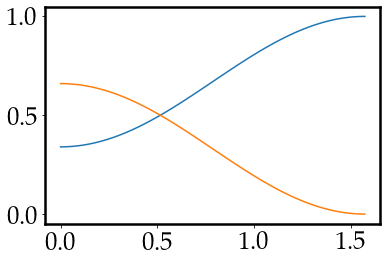

In [225]:
th = linspace(0.0,pi/2,100)
Q = (1-0.5*cos(th)**2.0)
plt.plot(th,(1-0.66*cos(th)**2.0))
plt.plot(th,0.66*cos(th)**2.0)


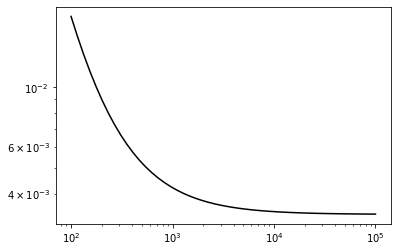

In [7]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean

Nuc = Ar40
m_chi = 5000.0
E_th = 4.0
E_max = 100.0
ne = 1000
E_r = logspace(-3,log10(200.0),ne)

mask = (E_r<E_max)&(E_r>E_th)

Names,Solar,E_nu_all,Flux_all,Flux_norm,Flux_err = GetNuFluxes(E_th,Nuc=Nuc)
dR_nu = AllNuRates(E_r,67.0+Jan1,Solar,E_nu_all,Flux_all,Nuc=Nuc)
f2 = dR_nu[3,:]/trapz(dR_nu[3,:],E_r)

nm = 50
chi2vals = zeros(shape=nm)
mm = logspace(log10(100.0),log10(100000.0),nm)
for i in range(0,nm):
    dR = dRdE_wimp(E_r,array([67.0+Jan1]),WIMP(mm[i],3.0e-49),Nuc=Nuc)
    f1 = dR/trapz(dR,E_r)
    
    chi2vals[i] = sum((f1[mask]-f2[mask])**2.0)

plt.loglog(mm,chi2vals,'k-')


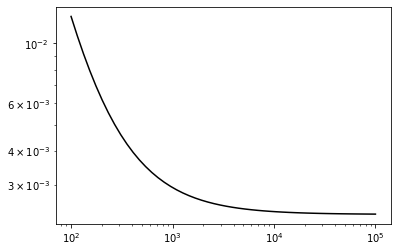

In [18]:
sig_E = Xe_sigE_approx(E_r,c1=0.33,c2=0.0)
f2_smear = SmearE(E_r,f2,sig_E)
chi2vals2 = zeros(shape=nm)
for i in range(0,nm):
    dR = dRdE_wimp(E_r,array([67.0+Jan1]),WIMP(mm[i],3.0e-49),Nuc=Nuc)
    f1 = dR/trapz(dR,E_r)
    f1_smear = SmearE(E_r,f1,sig_E)

    chi2vals2[i] = sum((f1_smear[mask]-f2_smear[mask])**2.0)

plt.loglog(mm,chi2vals2,'k-')

(4.0, 100.0)

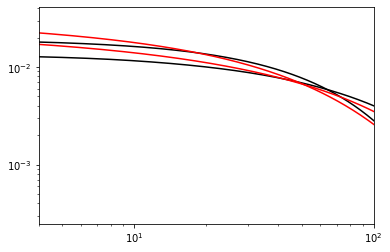

In [23]:
plt.loglog(E_r,f1,'k-')
plt.loglog(E_r,f2,'k-')

plt.loglog(E_r,f1_smear,'r-')
plt.loglog(E_r,f2_smear,'r-')
plt.xlim([E_th,E_max])

In [22]:
trapz(f1_smear,E_r)

0.9999999999999998